## Predicting the Prices of Airline Tickets

In [898]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [899]:
train_data=pd.read_excel(r"Data_Train.xlsx")

In [900]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [901]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Dealing with Missing Values

In [902]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [903]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [904]:
train_data.dropna(inplace=True)

In [905]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [906]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [907]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [908]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Performing Preprocessing and extracting derived attributed from Date_of_Journey

In [909]:
data=train_data.copy()

In [910]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [911]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [912]:
def change_into_DateTime(col):
    data[col]=pd.to_datetime(data[col])

In [913]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [914]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [915]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_DateTime(feature)

In [916]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [917]:
data["Journey_Day"]=data['Date_of_Journey'].dt.day

In [918]:
data["Journey_month"]=data['Date_of_Journey'].dt.month

In [919]:
data["Journey_year"]=data['Date_of_Journey'].dt.year

In [920]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-24 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [921]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Day                 int64
Journey_month               int64
Journey_year                int64
dtype: object

## Let's try to clean Dep_time and Arrival_time and then extract Derived_attributes

In [922]:
def extract_hour_min(df,col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head()

In [923]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-24 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-07-24 18:05:00,2023-07-24 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-07-24 16:50:00,2023-07-24 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [924]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-24 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-24 05:50:00,2023-07-24 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-24 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-07-24 18:05:00,2023-07-24 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-07-24 16:50:00,2023-07-24 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [925]:
cols_to_drop=["Arrival_Time","Dep_Time"]

In [926]:
data.drop(cols_to_drop,axis=1,inplace=True)

In [927]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [928]:
data.shape

(10682, 16)

In [929]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [930]:
def flight_dep_time(x):
    if(x>4)and(x<8):
        return "Early Morning"
    elif(x>8)and(x<12):
        return "Morning"
    elif(x>12)and(x<16):
        return "Afternoon"
    elif(x>16) and (x<20):
        return "Evening"
    elif(x>20)and(x<=24):
        return "Night"
    else:
        return "Mid-Night"

<AxesSubplot:>

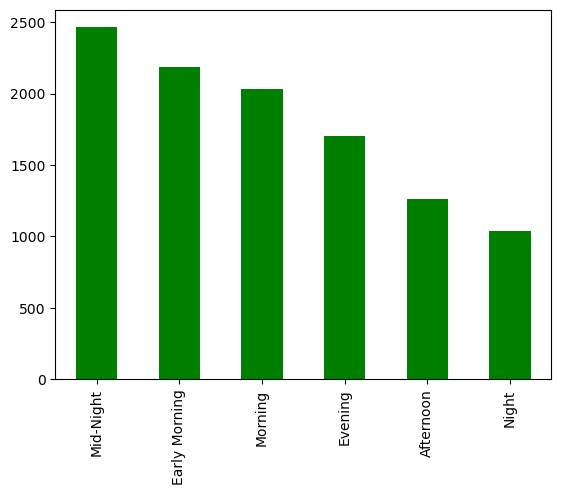

In [931]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color='green')

In [932]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [933]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [934]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar",color='green')

In [935]:
def preprocess_duration(x):
    if 'h' not in x:
        x="0h"+" "+x
    elif 'm' not in x:
        x = x+" "+"0m"
    
    return x
    

In [936]:
data['Duration']=data["Duration"].apply(preprocess_duration)

In [937]:
data["Duration"][0]

'2h 50m'

In [938]:
"2h 50m".split()

['2h', '50m']

In [939]:
"2h 50m".split()[0]

'2h'

In [940]:
type("2h 50m".split()[0][0:-1])

str

In [941]:
int("2h 50m".split()[0][0:-1])

2

In [942]:
int("2h 50m".split()[1][0:-1])

50

In [943]:
data["Duration_hour"]=data["Duration"].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [944]:
data["Duration_minute"]=data["Duration"].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [945]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [946]:
data['Duration_Total_mins']=data["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [947]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins'],
      dtype='object')

<AxesSubplot:xlabel='Duration_Total_mins', ylabel='Price'>

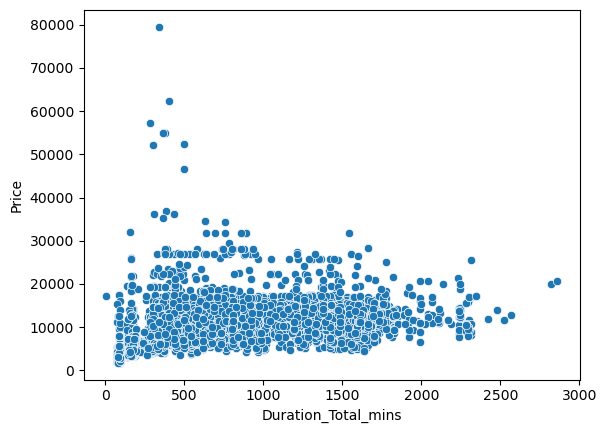

In [948]:
sns.scatterplot(x='Duration_Total_mins',y='Price',data=data)

<AxesSubplot:xlabel='Duration_Total_mins', ylabel='Price'>

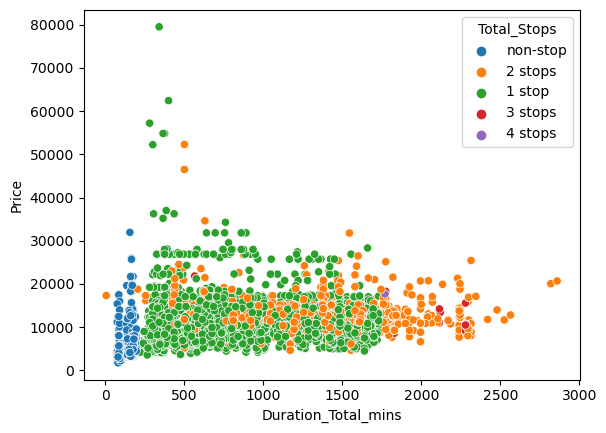

In [949]:
sns.scatterplot(x='Duration_Total_mins',hue="Total_Stops",y='Price',data=data)

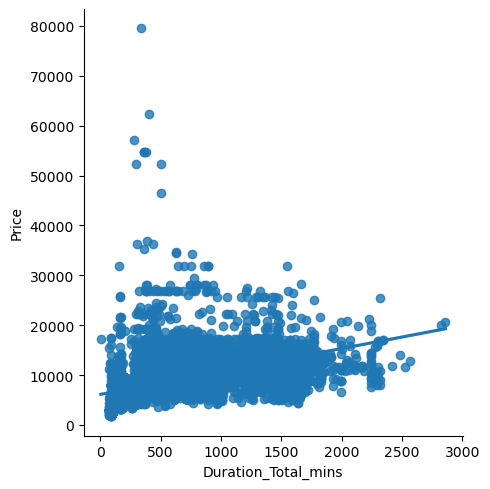

In [950]:
sns.lmplot(x='Duration_Total_mins',y='Price',data=data)

In [951]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

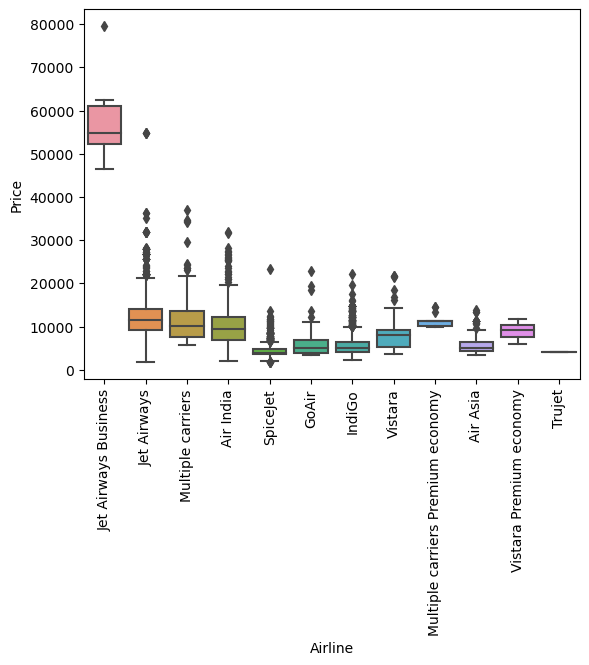

In [952]:
sns.boxplot(y="Price",x="Airline",data=data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Applying One Hot Encoding

In [953]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


In [954]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [955]:
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [956]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [957]:
data['Source'].apply(lambda x:1 if x=="Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [958]:
for sub_category in data["Source"].unique():
    data["Source "+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [959]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [960]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [961]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_Day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute',
 'Duration_Total_mins']

In [962]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [963]:
data["Airline"].nunique()

12

In [964]:
data.groupby(['Airline'])["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [965]:
airlines=data.groupby(['Airline'])["Price"].mean().sort_values().index

In [966]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [967]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [968]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [969]:
data["Airline"]=data["Airline"].map(dict_airlines)

In [970]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [971]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [972]:
data["Destination"].replace("New Delhi","Delhi",inplace=True)

In [973]:
data['Destination'].nunique()

5

In [974]:
dest=data.groupby(['Destination'])["Price"].mean().sort_values().index

In [975]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [976]:
dest_dict={key:index for index,key in enumerate(dest,0)}

In [977]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [978]:
data['Destination']=data['Destination'].map(dest_dict)

In [979]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [980]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [981]:
data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [982]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [983]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [984]:
data["Total_Stops"]=data["Total_Stops"].map(stop)

In [985]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [986]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins', 'Source Banglore',
       'Source Kolkata', 'Source Delhi', 'Source Chennai', 'Source Mumbai'],
      dtype='object')

In [987]:
data["Additional_Info"].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [988]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0


In [989]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins', 'Source Banglore',
       'Source Kolkata', 'Source Delhi', 'Source Chennai', 'Source Mumbai'],
      dtype='object')

In [990]:
data.drop(columns=["Date_of_Journey",'Additional_Info','Source',"Journey_year","Route","Duration"],axis=1,inplace=True)

In [991]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,325,0,1,0,0,0


In [992]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,1140,0,0,1,0,0


In [993]:
data

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302,3,1,16,50,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107,4,9,19,55,22,25,2,30,150,0,1,0,0,0
10679,7,3,0,4145,27,4,20,45,23,20,2,35,155,0,1,0,0,0
10680,10,2,0,7229,27,4,8,20,11,20,3,0,180,1,0,0,0,0
10681,5,2,0,12648,3,1,11,30,14,10,2,40,160,1,0,0,0,0


In [994]:
def plot(df,col):
    fig ,(ax1,ax2,ax3)=plt.subplots(3,1)

    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)


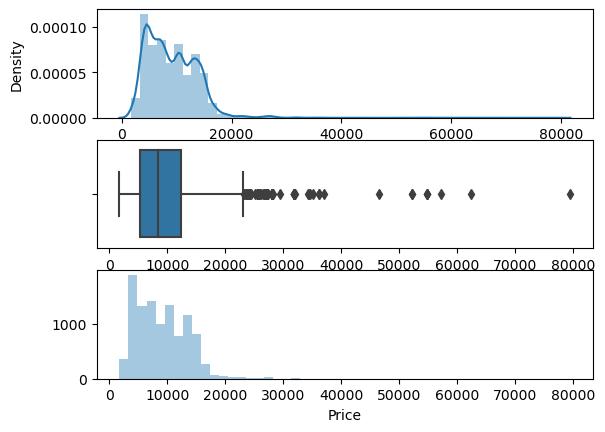

In [995]:
plot(data,'Price')

In [996]:
q3=data["Price"].quantile(0.75)
q1=data["Price"].quantile(0.25)

iqr=q3-q1

max=q3+1.5*iqr
min=q1-1.5*iqr

In [997]:
print(max)

23017.0


In [998]:
print(min)

-5367.0


In [999]:
i=0
for price in data["Price"]:
    if (price>max or price<min):
        print(price)
        i=i+1



27430
36983
26890
26890
25139
27210
52229
26743
26890
25735
27992
26890
26890
23583
26890
23533
24115
25735
54826
31783
27992
26890
26890
25430
36235
27210
26890
25735
54826
26890
35185
79512
28097
27992
26890
25735
26092
31825
25913
25735
27992
31825
23267
62427
54826
31825
25430
26890
36235
23843
26890
25735
28322
25735
25735
31825
26890
27992
34273
46490
29528
26890
26890
26890
34503
26890
27992
26890
26890
23170
24528
26890
27992
25735
34608
25703
26890
23528
31825
27282
25735
27992
52285
24017
31945
26890
24318
23677
27992
24210
57209
26890
31825
26480


In [1000]:
print(i)

94


In [1001]:
data['Price']=np.where(data["Price"]>=35000,data["Price"].median(),data["Price"])

In [1002]:
data["Price"]

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

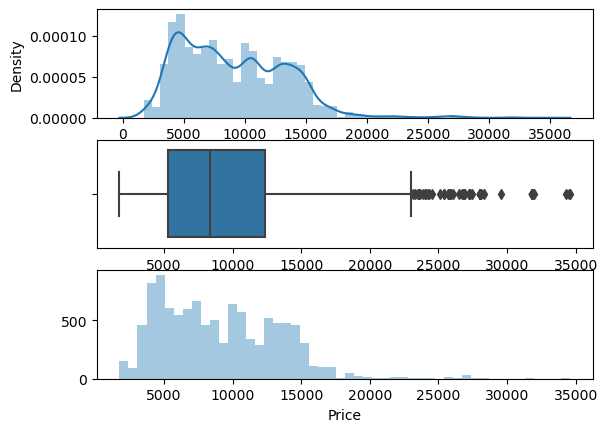

In [1003]:
plot(data,"Price")

## Feature Selection

In [1004]:
data

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107.0,4,9,19,55,22,25,2,30,150,0,1,0,0,0
10679,7,3,0,4145.0,27,4,20,45,23,20,2,35,155,0,1,0,0,0
10680,10,2,0,7229.0,27,4,8,20,11,20,3,0,180,1,0,0,0,0
10681,5,2,0,12648.0,3,1,11,30,14,10,2,40,160,1,0,0,0,0


In [1005]:
X=data.drop(["Price"],axis=1)

In [1006]:
y=data["Price"]

In [1007]:
from sklearn.feature_selection import mutual_info_regression

In [1008]:
imp=mutual_info_regression(X,y)

In [1009]:
imp

array([0.9758631 , 0.99002743, 0.79817849, 0.19579661, 0.23787495,
       0.34433177, 0.26060376, 0.39897511, 0.34168678, 0.46962748,
       0.35069035, 0.49360447, 0.38825394, 0.45049278, 0.52717888,
       0.13701043, 0.19205886])

In [1010]:
imp_df=pd.DataFrame(imp,index=X.columns)

In [1011]:
imp_df.columns=["importance"]

In [1012]:
imp_df

,importance
Airline,0.975863
Destination,0.990027
Total_Stops,0.798178
Journey_Day,0.195797
Journey_month,0.237875
Dep_Time_hour,0.344332
Dep_Time_minute,0.260604
Arrival_Time_hour,0.398975
Arrival_Time_minute,0.341687
Duration_hour,0.469627


In [1013]:
imp_df.sort_values(by="importance",ascending=False)

,importance
Destination,0.990027
Airline,0.975863
Total_Stops,0.798178
Source Delhi,0.527179
Duration_Total_mins,0.493604
Duration_hour,0.469627
Source Kolkata,0.450493
Arrival_Time_hour,0.398975
Source Banglore,0.388254
Duration_minute,0.350690


## Building ML Model

In [1014]:
from sklearn.model_selection import train_test_split


In [1015]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [1016]:
X_train

,Airline,Destination,Total_Stops,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
752,3,4,1,27,5,16,0,21,0,5,0,300,0,0,1,0,0
7430,3,3,0,3,6,15,10,17,45,2,35,155,0,1,0,0,0
5478,10,3,1,6,12,18,55,19,50,24,55,1495,0,1,0,0,0
3445,10,4,1,6,6,11,30,4,25,16,55,1015,0,0,1,0,0
9126,10,4,1,5,9,20,55,4,25,7,30,450,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,10,4,1,27,3,9,0,4,25,19,25,1165,0,0,1,0,0
5191,10,3,1,5,9,14,5,20,45,6,40,400,0,1,0,0,0
5390,8,4,1,15,5,12,50,1,30,12,40,760,0,0,1,0,0
860,3,2,0,3,3,0,40,3,25,2,45,165,1,0,0,0,0


In [1017]:
X_test

,Airline,Destination,Total_Stops,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_Total_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,625,0,0,1,0,0
3544,4,4,1,6,3,10,35,19,35,9,0,540,0,0,1,0,0
9291,5,3,1,5,9,20,20,9,5,12,45,765,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,140,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,335,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,10,2,1,18,3,16,55,23,0,6,5,365,1,0,0,0,0
8416,7,4,2,3,3,9,45,9,25,23,40,1420,0,0,1,0,0
2605,3,2,0,21,6,0,25,3,15,2,50,170,1,0,0,0,0
1392,8,4,1,27,6,17,45,1,30,7,45,465,0,0,1,0,0


In [1018]:
y_train

752      5054.0
7430     5618.0
5478    13044.0
3445    14714.0
9126    12373.0
         ...   
5734    12242.0
5191    10844.0
5390     7670.0
860      6144.0
7270    10262.0
Name: Price, Length: 8011, dtype: float64

In [1019]:
y_test

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
         ...   
3022    13555.0
8416    12760.0
2605     3419.0
1392     5797.0
8535     6818.0
Name: Price, Length: 2671, dtype: float64

In [1020]:
from sklearn.ensemble import RandomForestRegressor

In [1021]:
ml_model=RandomForestRegressor()

In [1022]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [1023]:
y_pred=ml_model.predict(X_test)

In [1024]:
from sklearn import metrics


In [1025]:

metrics.r2_score(y_test,y_pred)

0.8119171052689644

In [1026]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [1027]:
import pickle

In [1028]:
file=open("rf_random.pkl","wb")

In [1029]:
pickle.dump(ml_model,file)

In [1030]:
model=open("rf_random.pkl","rb")

In [1031]:
forest=pickle.load(model)

In [1032]:
forest.predict(X_test)

array([16693.49,  6120.  ,  8826.66, ...,  3595.46,  6477.05,  7563.97])

In [1033]:
y_pred2=forest.predict(X_test)

In [1034]:
metrics.r2_score(y_pred2,y_test)

0.7833179333300211

In [1035]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100


In [1036]:
mape(y_test,y_pred)

13.214608609616604

In [1037]:
from sklearn import metrics


In [1038]:
def Predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print("Training Score : {}".format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print("Predictions are: {}".format(y_prediction))
    print("\n")
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("r2_score:{}".format(r2_score))
    print("MAE:{}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("MSE:{}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE: {}".format(mape(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)


Training Score : 0.9506746269020663
Predictions are: [16715.33  6072.07  8944.14 ...  3544.05  6266.27  7367.35]


r2_score:0.8114924939383708
MAE:1185.605867367854
MSE:3669788.6619364438
RMSE:1915.6692464870976
MAPE: 13.369341695083694


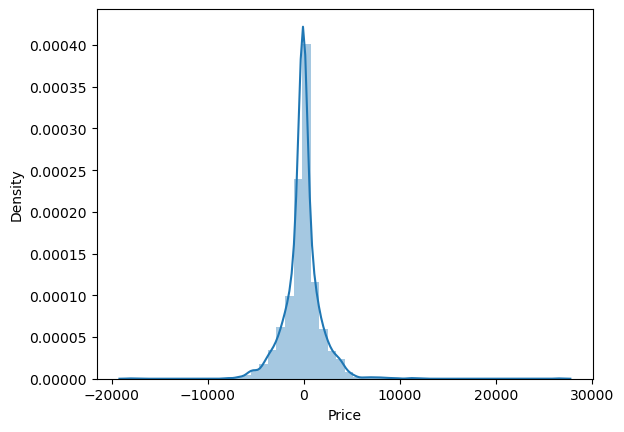

In [1039]:
Predict(RandomForestRegressor())

In [1040]:
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.966591628243878
Predictions are: [16840.  5752.  9187. ...  3419.  5797.  6818.]


r2_score:0.7306776307658539
MAE:1316.084113315862
MSE:5243060.065195516
RMSE:2289.772928741083
MAPE: 14.770112348488624


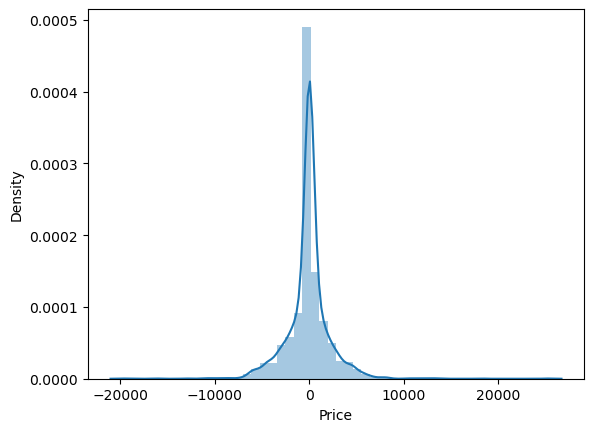

In [1041]:
Predict(DecisionTreeRegressor())

## HyperTune ML Model

In [1042]:
from sklearn.model_selection import RandomizedSearchCV


In [1043]:
rf=RandomForestRegressor()

In [1044]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [1045]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

max_features=["auto","sqrt"]

max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15.100]

In [1046]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [1047]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15.1]}

In [1048]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [1049]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15.1],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [1050]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [1051]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=1200)

In [1052]:
rf_random.best_score_

0.8108675120143546